In [1]:
import med_dataloader as med_dl

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
import shutil

try:
    shutil.rmtree("Test_Dataset_quality_improvement_TF")
except:
    pass

In [3]:
med_dl.generate_dataset(data_dir=r"Test_Dataset_quality_improvement",
                        imgA_label="CBCT",
                        imgB_label="CT",
                        input_size=256,
                        norm_boundsA=[-1024, 3200],
                        norm_boundsB=[-1024, 3200],
                        )

train_ds, valid_ds, test_ds = med_dl.get_dataset(data_dir=r"Test_Dataset_quality_improvement_TF",
                                                 percentages=[0.8, 0.1, 0.1],
                                                 batch_size=4,
                                                 train_augmentation=True,
                                                 random_crop_size=None,
                                                 random_rotate=True,
                                                 random_flip=True,
                                                 )

Caching decoded images in Test_Dataset_quality_improvement_TF\CBCT.cache...
30/30
Cached decoded images in Test_Dataset_quality_improvement_TF\CBCT.cache.
Caching decoded images in Test_Dataset_quality_improvement_TF\CT.cache...
30/30
Cached decoded images in Test_Dataset_quality_improvement_TF\CT.cache.


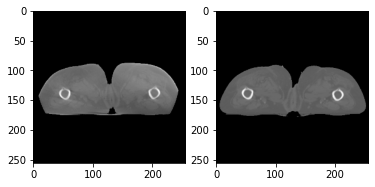

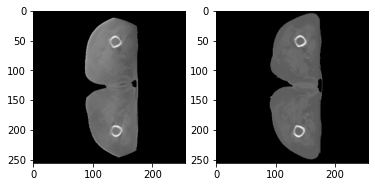

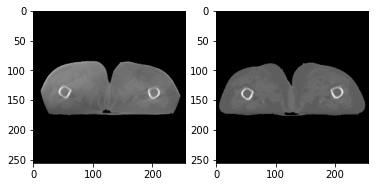

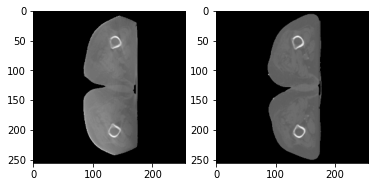

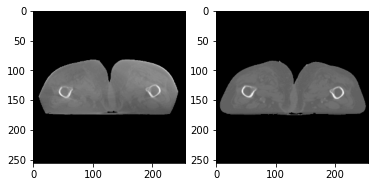

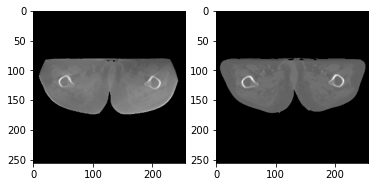

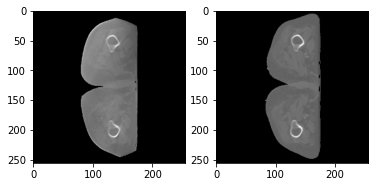

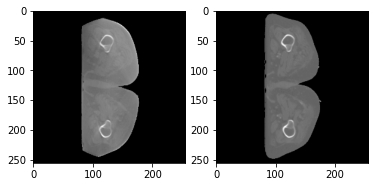

In [4]:
import matplotlib.pyplot as plt

for batch in train_ds.take(2):
    imgA_batch, imgB_batch = batch
    for imgA, imgB in zip(imgA_batch, imgB_batch):
        plt.subplot(121)
        plt.imshow(imgA[:,:,0], cmap="gray")
        plt.subplot(122)
        plt.imshow(imgB[:,:,0], cmap="gray")
        plt.show()